In [70]:
import sklearn
import pandas as pd
import numpy as np

## PART 1

In [71]:
dat = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

In [72]:
dat.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [73]:
dat.isna().sum()
#no NAs

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

In [74]:
dat_dumb = pd.get_dummies(dat)

In [75]:
dat_dumb.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True
1,33,22.705,21984.47061,False,True,True,False,False,True,False,False
2,32,28.880,3866.85520,False,True,True,False,False,True,False,False
3,31,25.740,3756.62160,True,False,True,False,False,False,True,False
4,60,25.840,28923.13692,True,False,True,False,False,True,False,False


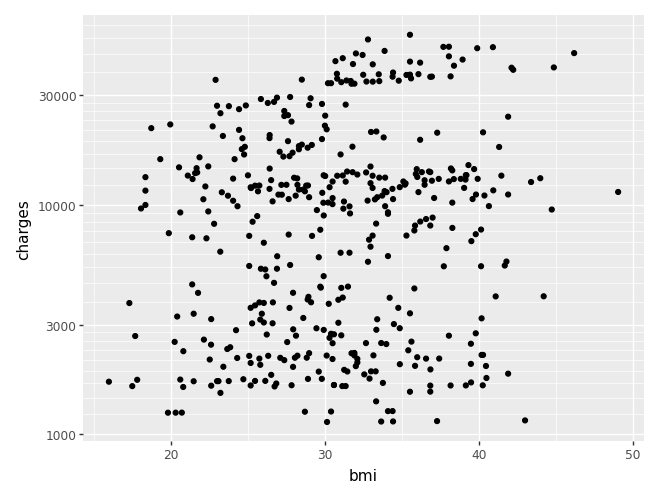

In [ ]:
from plotnine import *
(
    ggplot(dat, aes(x="bmi", y="charges"))
    +geom_point()
    +scale_y_log10()
)



This plot between bmi and charges doesn't seem to show much correlation between the two varibles. There are small clumps are certain spots but doesn't seem to follow a certain pattern.

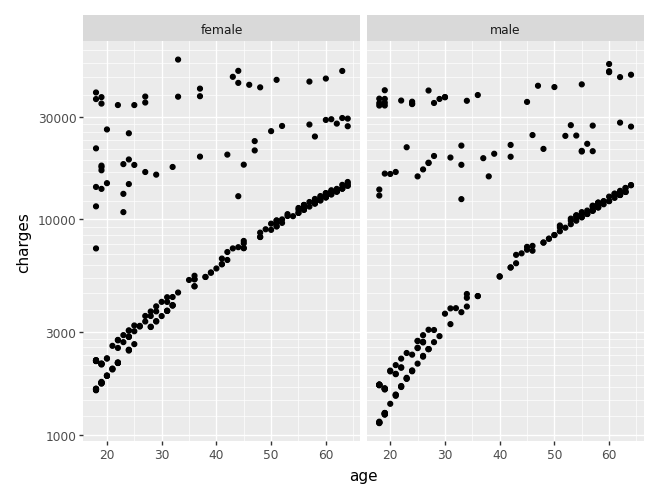

In [ ]:
(
    ggplot(dat, aes(x="age", y="charges"))
    +geom_point()
    +facet_wrap("sex")
    +scale_y_log10()
)



These plots show how age predicts charges between both sexes. This is very interesting because we see a curve in both the male and female graphs that indicates some kind of log relationship between the 2 variables.


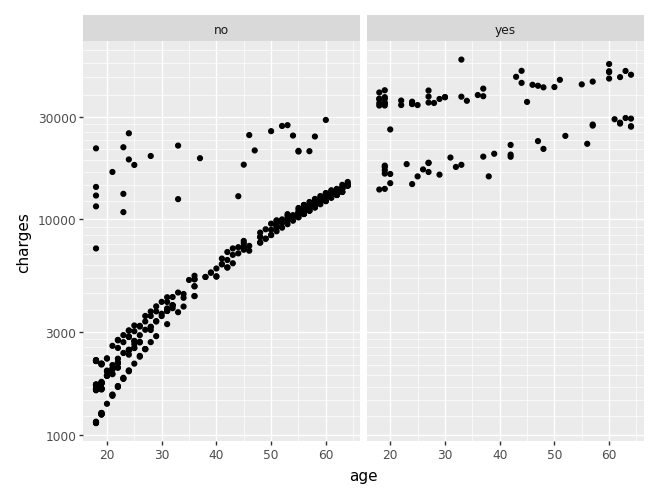

In [ ]:
(
    ggplot(dat, aes(x="age", y="charges"))
    +geom_point()
    +facet_wrap("smoker")
    +scale_y_log10()
)


These plots show us as age increases, medical charges rise for everyone, but smokers consistently have much higher and more variable costs than non-smokers. The log scale makes this difference visually clear and highlights how smoking significantly drives up medical expenses.

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()

## PART 2

Model 1 Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [80]:
X = dat_dumb[["age"]]
y = dat_dumb["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [81]:
lr_fit = lr.fit(X_train, y_train)

In [82]:
lr_fit.coef_

array([215.07912989])

In [83]:
y_pred_lr = lr_fit.predict(X_test)
mean_squared_error(y_test, y_pred_lr)

137051847.3543298

In [84]:
r2_score(y_test, y_pred_lr)

0.11684914427630078

In [85]:
print("Coefficients:", lr_fit.coef_)
print("MSE:",mean_squared_error(y_test, y_pred_lr))
print("R-sqaured:",r2_score(y_test, y_pred_lr))

Coefficients: [215.07912989]
MSE: 137051847.3543298
R-sqaured: 0.11684914427630078


The coefficients of 215 indicates that for every one unit increase in age your chrage value will increase by 215. This model isn't the best for predicting with an MSE of 137 million and R squared of  0.11685

 Make a model that also incorporates the variable sex. Report your results.

In [86]:
X = dat_dumb[["age","sex_male"]]
y = dat_dumb["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit_model2 = lr.fit(X_train, y_train)
lr_fit_model2.coef_


array([ 222.95650263, -159.70695001])

In [87]:
y_pred_lr = lr_fit.predict(X_test)
mean_squared_error(y_test, y_pred_lr)

140916830.94852024

In [88]:
r2_score(y_test, y_pred_lr)

0.09483696390994034

In [89]:
print("Coefficients:", lr_fit_model2.coef_)
print("MSE:",mean_squared_error(y_test, y_pred_lr))
print("R-sqaured:",r2_score(y_test, y_pred_lr))

Coefficients: [ 222.95650263 -159.70695001]
MSE: 140916830.94852024
R-sqaured: 0.09483696390994034


Now make a model that does not include sex, but does include smoker. Report your results

In [90]:
X = dat_dumb[["age","smoker_yes"]]
y = dat_dumb["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit_model3 = lr.fit(X_train, y_train)
lr_fit_model3.coef_

array([  261.46339224, 25390.37082905])

In [91]:
y_pred_lr = lr_fit.predict(X_test)
mean_squared_error(y_test, y_pred_lr)

35586498.5923844

In [92]:
r2_score(y_test, y_pred_lr)

0.6789241829430963

In [93]:
print("Coefficients:", lr_fit_model3.coef_)
print("MSE:",mean_squared_error(y_test, y_pred_lr))
print("R-sqaured:",r2_score(y_test, y_pred_lr))

Coefficients: [  261.46339224 25390.37082905]
MSE: 35586498.5923844
R-sqaured: 0.6789241829430963


The smoker model better fits the data because it has a higher R-sqaured. 0.67 > 0.09. Also the MSE of the smoker model is lower then that of the sex model.

## PART 3

In [94]:
X = dat_dumb[["age","bmi"]]
y = dat_dumb["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit_model4 = lr.fit(X_train, y_train)
lr_fit_model4.coef_

array([238.79916268, 237.77999845])

In [95]:
y_pred_lr = lr_fit.predict(X_test)
mean_squared_error(y_test, y_pred_lr)

144090715.38974446

In [96]:
r2_score(y_test, y_pred_lr)

0.05692128268112895

In [97]:
print("Coefficients:", lr_fit_model4.coef_)
print("MSE:",mean_squared_error(y_test, y_pred_lr))
print("R-sqaured:",r2_score(y_test, y_pred_lr))

Coefficients: [238.79916268 237.77999845]
MSE: 144090715.38974446
R-sqaured: 0.05692128268112895


 The MSE is higher than the MSE in part 2 Q1. And the  R-squared is lower than P2Q1. This model is not as strong

Fit a model that uses age and age^2 as predictors.

In [127]:
dat_dumb["age_sq"] = dat_dumb["age"]**2

In [99]:
X2 = dat_dumb[["age","age_sq"]]
y = dat_dumb["charges"]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)
lr_fit_model5 = lr.fit(X2_train, y_train)
lr_fit_model5.coef_

array([466.47573696,  -2.85551354])

In [100]:
y_pred_lr = lr_fit.predict(X2_test)
mean_squared_error(y_test, y_pred_lr)

176150083.5671953

In [101]:
r2_score(y_test, y_pred_lr)

0.005881778228458812

In [102]:
print("Coefficients:", lr_fit_model5.coef_)
print("MSE:",mean_squared_error(y_test, y_pred_lr))
print("R-sqaured:",r2_score(y_test, y_pred_lr))

Coefficients: [466.47573696  -2.85551354]
MSE: 176150083.5671953
R-sqaured: 0.005881778228458812


The MSE is higher and the R-squared is lower then in P2Q1

Fit a polynomial model of degree 4.

In [103]:
dat_dumb["age_3"] = dat_dumb["age"]**3
dat_dumb["age_4"] = dat_dumb["age"]**4
dat_dumb["age_5"] = dat_dumb["age"]**5
dat_dumb["age_6"] = dat_dumb["age"]**6
dat_dumb["age_7"] = dat_dumb["age"]**7
dat_dumb["age_8"] = dat_dumb["age"]**8
dat_dumb["age_9"] = dat_dumb["age"]**9
dat_dumb["age_10"] = dat_dumb["age"]**10
dat_dumb["age_11"] = dat_dumb["age"]**11
dat_dumb["age_12"] = dat_dumb["age"]**12

In [104]:
X4 = dat_dumb[["age","age_4"]]
y = dat_dumb["charges"]
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)
lr_fit_model6 = lr.fit(X4_train, y_train)
lr_fit_model6.coef_

array([1.88855372e+02, 6.73629486e-05])

In [105]:
y_pred_lr = lr_fit.predict(X4_test)
mean_squared_error(y_test, y_pred_lr)

105219490.03595139

In [106]:
r2_score(y_test, y_pred_lr)

0.16274569401697392

In [107]:
print("Coefficients:", lr_fit_model6.coef_)
print("MSE:",mean_squared_error(y_test, y_pred_lr))
print("R-sqaured:",r2_score(y_test, y_pred_lr))

Coefficients: [1.88855372e+02 6.73629486e-05]
MSE: 105219490.03595139
R-sqaured: 0.16274569401697392


With an MSE of 105 million and R-sqared of 0.1627, This model is stronger then P2Q1 as the MSE is lower and R squared is higher

Fit a polynomial model of degree 12

In [108]:
X12 = dat_dumb[["age","age_12"]]
y = dat_dumb["charges"]
X12_train, X12_test, y_train, y_test = train_test_split(X12, y, test_size=0.25)
lr_fit_model7 = lr.fit(X12_train, y_train)
lr_fit_model7.coef_

array([ 1.58505764e-34, -1.08477391e-16])

In [109]:
y_pred_lr = lr_fit.predict(X12_test)
mean_squared_error(y_test, y_pred_lr)

95828508.48752382

In [110]:
r2_score(y_test, y_pred_lr)

-0.018492956106579195

In [111]:
print("Coefficients:", lr_fit_model7.coef_)
print("MSE:",mean_squared_error(y_test, y_pred_lr))
print("R-sqaured:",r2_score(y_test, y_pred_lr))

Coefficients: [ 1.58505764e-34 -1.08477391e-16]
MSE: 95828508.48752382
R-sqaured: -0.018492956106579195


This model has a smaller MSE then P2Q1, becuase it overfits by taking it to the 12th degree. The R squared is much lower and negative. 

Part 3 Q5) The best model is taking age to the 4th degree as it provided athe smaller MSE along with higher R-squared, unlike the 12th degree which had the smallest MSE but a smaller R-squared also. However, I do not consider it the best model overall, since the additional complexity may lead to overfitting  to new data.

Part 3 Q6)

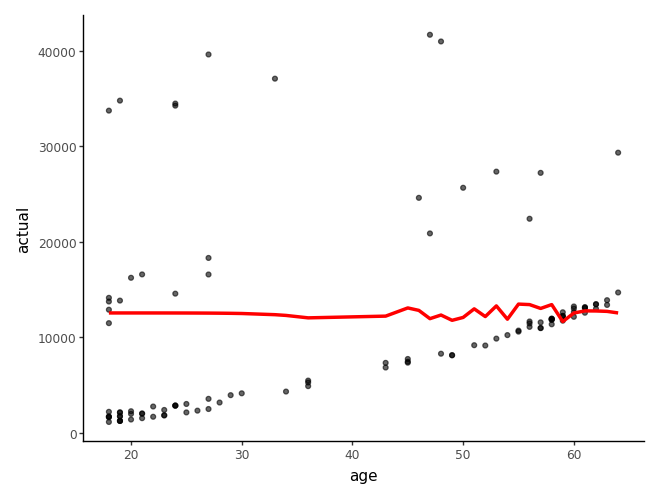

In [112]:
results = X12_test.copy()
results['actual'] = y_test.values
results["predicted"] = y_pred_lr
(
    ggplot(results, aes(x="age", y="actual"))
    + geom_point(alpha=0.6)
    + geom_line(aes(y='predicted'),color = 'red', size = 1.4)
    + theme_classic()
)

## Part 4

In [113]:
new_dat = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

In [114]:
new_dat = pd.get_dummies(new_dat)

In [115]:
new_dat["age_smoker"] = new_dat["age"] * new_dat["smoker_yes"]
new_dat["bmi_smoker"] = new_dat["bmi"] * new_dat["smoker_yes"]
dat_dumb["age_smoker"] = dat_dumb["age"] * dat_dumb["smoker_yes"]
dat_dumb["bmi_smoker"] = dat_dumb["bmi"] * dat_dumb["smoker_yes"]

In [116]:
from sklearn.linear_model import LinearRegression as lr
y_old = dat_dumb['charges']
y_new = new_dat['charges']

X_old_1 = dat_dumb[['age']]
X_new_1 = new_dat[['age']]

X_old_2 = dat_dumb[['age','bmi']]
X_new_2 = new_dat[['age','bmi']]

X_old_3 = dat_dumb[['age','bmi','smoker_yes']]
X_new_3 = new_dat[['age','bmi','smoker_yes']]

X_old_4 = dat_dumb[['age_smoker','bmi_smoker']]
X_new_4 = new_dat[['age_smoker','bmi_smoker']]

X_old_5 = dat_dumb[['age','bmi','smoker_yes','age_smoker','bmi_smoker']]
X_new_5 = new_dat[['age','bmi','smoker_yes','age_smoker','bmi_smoker']]

P4Model1 = lr().fit(X_old_1,y_old)
P4Model2 = lr().fit(X_old_2,y_old)
P4Model3 = lr().fit(X_old_3,y_old)
P4Model4 = lr().fit(X_old_4,y_old)
P4Model5 = lr().fit(X_old_5,y_old)

y_predModel1 = P4Model1.predict(X_new_1)
y_predModel2 = P4Model2.predict(X_new_2)
y_predModel3 = P4Model3.predict(X_new_3)
y_predModel4 = P4Model4.predict(X_new_4)
y_predModel5 = P4Model5.predict(X_new_5)



In [117]:
print("Model 1 Coefficients:", P4Model1.coef_)
print("Model 1 MSE:",mean_squared_error(y_new, y_predModel1))
print("Model 1 R-squared", r2_score(y_new, y_predModel1))

Model 1 Coefficients: [228.79904937]
Model 1 MSE: 136077136.50195494
Model 1 R-squared 0.12236515675533055


In [118]:
print("Model 2 Coefficients:", P4Model2.coef_)
print("Model 2 MSE:",mean_squared_error(y_new, y_predModel2))
print("Model 2 R-squared", r2_score(y_new, y_predModel2))

Model 2 Coefficients: [216.29721472 283.20380126]
Model 2 MSE: 132636406.1108129
Model 2 R-squared 0.14455628272331222


In [119]:
print("Model 3 Coefficients:", P4Model3.coef_)
print("Model 3 MSE:",mean_squared_error(y_new, y_predModel3))
print("Model 3 R-squared", r2_score(y_new, y_predModel3))

Model 3 Coefficients: [  240.72164671   281.31845364 24043.82827651]
Model 3 MSE: 35377541.24141632
Model 3 R-squared 0.7718311565047801


In [120]:
print("Model 4 Coefficients:", P4Model4.coef_)
print("Model 4 MSE:",mean_squared_error(y_new, y_predModel4))
print("Model 4 R-squared", r2_score(y_new, y_predModel4))

Model 4 Coefficients: [107.05762116 677.00833574]
Model 4 MSE: 47626025.35814417
Model 4 R-squared 0.6928340765095315


In [121]:
print("Model 5 Coefficients:", P4Model5.coef_)
print("Model 5 MSE:",mean_squared_error(y_new, y_predModel5))
print("Model 5 R-squared", r2_score(y_new, y_predModel5))

Model 5 Coefficients: [ 2.58179772e+02  5.36117114e+00 -2.09937051e+04 -1.24532947e+01
  1.48116585e+03]
Model 5 MSE: 21786256.866852686
Model 5 R-squared 0.8594886795699609


Based on MSE Model 5, which inlcuded age, bmi, and smoker, as predictors, with both quantitative variables having an interaction term with smoker, is the best model to use.

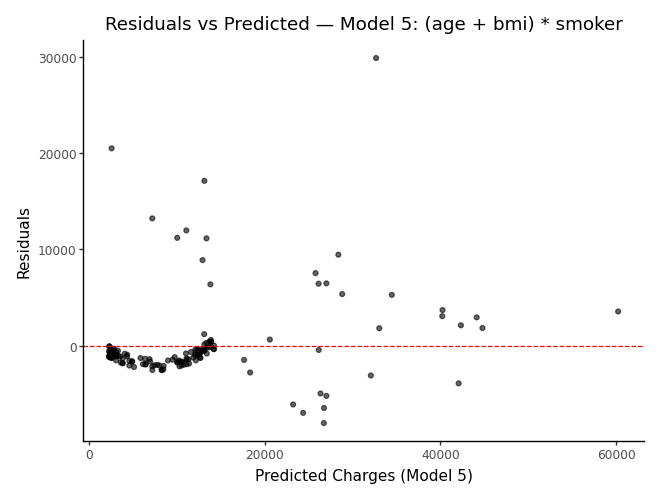

In [122]:
results = new_dat.copy()
results['pred_Model5'] = y_predModel5
results["resid_Model5"] = y_new - results['pred_Model5']
(
    ggplot(results, aes(x="pred_Model5", y="resid_Model5"))
    + geom_point(alpha=0.6)
    + geom_hline(yintercept=0, linetype="dashed", color="red")
    + labs(
        title="Residuals vs Predicted — Model 5: (age + bmi) * smoker",
        x="Predicted Charges (Model 5)",
        y="Residuals"
    )
    + theme_classic()
)

## PART 5

In [123]:
new_dat["age_2"] = new_dat["age"]**2
new_dat["age_3"] = new_dat["age"]**3
new_dat["bmi_2"] = new_dat["bmi"]**2
new_dat["bmi_3"] = new_dat["bmi"]**3

dat_dumb["age_2"] = dat_dumb["age"]**2
dat_dumb["age_3"] = dat_dumb["age"]**3
dat_dumb["bmi_2"] = dat_dumb["bmi"]**2
dat_dumb["bmi_3"] = dat_dumb["bmi"]**3

y_old = dat_dumb["charges"]
y_new = new_dat["charges"]

X_old_1 = dat_dumb[["age","bmi","smoker_yes"]]
X_new_1 = new_dat[["age","bmi","smoker_yes"]]

X_old_2 = dat_dumb[["age","bmi","smoker_yes","age_2","bmi_2"]]
X_new_2 = new_dat[["age","bmi","smoker_yes","age_2","bmi_2"]]

X_old_3 = dat_dumb[["age","bmi","smoker_yes","age_2","bmi_2","age_3","bmi_3"]]
X_new_3 = new_dat[["age","bmi","smoker_yes","age_2","bmi_2","age_3","bmi_3"]]

X_old_4 = dat_dumb[[
    "age","bmi","smoker_yes","age_2","bmi_2","age_3","bmi_3",
    "age_smoker","bmi_smoker"
]]
X_new_4 = new_dat[[
    "age","bmi","smoker_yes","age_2","bmi_2","age_3","bmi_3",
    "age_smoker","bmi_smoker"
]]

M1 = lr().fit(X_old_1, y_old)
M2 = lr().fit(X_old_2, y_old)
M3 = lr().fit(X_old_3, y_old)
M4 = lr().fit(X_old_4, y_old)

p1 = M1.predict(X_new_1)
p2 = M2.predict(X_new_2)
p3 = M3.predict(X_new_3)
p4 = M4.predict(X_new_4)

mse1 = mean_squared_error(y_new, p1)
mse2 = mean_squared_error(y_new, p2)
mse3 = mean_squared_error(y_new, p3)
mse4 = mean_squared_error(y_new, p4)

mse1, mse2, mse3, mse4


(35377541.24141632, 35327847.561730586, 36347672.67416101, 22507371.870984606)

In [124]:
mse_results = pd.DataFrame({
    "Model": ["Base","Poly2","Poly3","Poly3 + Interactions"],
    "MSE": [mse1,mse2,mse3,mse4]
})

print(mse_results.sort_values("MSE"))


                  Model           MSE
3  Poly3 + Interactions  2.250737e+07
1                 Poly2  3.532785e+07
0                  Base  3.537754e+07
2                 Poly3  3.634767e+07


In [125]:
new_dat["pred_best"] = p4
new_dat["resid_best"] = new_dat["charges"] - new_dat["pred_best"]


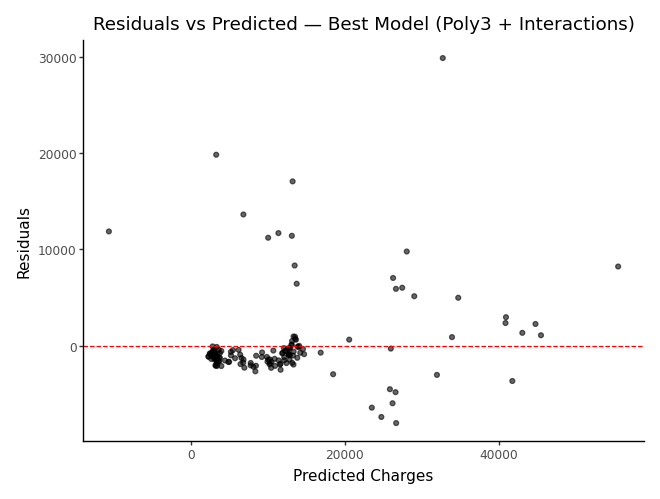

In [126]:
(
        ggplot(new_dat, aes(x="pred_best", y="resid_best"))
    + geom_point(alpha=0.6)
    + geom_hline(yintercept=0, linetype="dashed", color="red")
    + labs(
        title="Residuals vs Predicted — Best Model (Poly3 + Interactions)",
        x="Predicted Charges",
        y="Residuals"
    )
    + theme_classic()
)
